In [2]:
# Dependencies and libraries we need to make our code works 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

In [3]:
#load the files
city = "city_data.csv"
ride = "ride_data.csv"

In [4]:
#Read city & ride file
city = pd.read_csv("city_data.csv")
ride = pd.read_csv("ride_data.csv")

In [5]:
# creat DataFrame of each file to new variable to refer to later
city = pd.DataFrame(city)
city.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
ride = pd.DataFrame(ride)
ride.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [7]:
#merge 2 DataFrames into one DataFrame called df
df = pd.merge(city, ride, on="city", how="outer")

In [8]:
df = df.groupby(["city", "type"])
df = pd.DataFrame(round(df.mean(),2))
df = df.reset_index()
df.head()

,city,type,driver_count,fare,ride_id
0,Amandaburgh,Urban,12.0,24.64,5.359336e+12
1,Barajasview,Urban,26.0,25.33,4.676968e+12
2,Barronchester,Suburban,11.0,36.42,4.460796e+12
3,Bethanyland,Suburban,22.0,32.96,5.842550e+12
4,Bradshawfurt,Rural,7.0,40.06,3.735294e+12


In [9]:
# Find out total number of rides per city
city_count = ride.copy()

city_count = city_count.groupby('city')['ride_id'].count()
city_count = pd.DataFrame(city_count)

city_count = city_count.reset_index()
city_count = city_count.rename(columns={'ride_id':'Total number of rides'})
city_count.head()

,city,Total number of rides
0,Amandaburgh,18
1,Barajasview,22
2,Barronchester,16
3,Bethanyland,18
4,Bradshawfurt,10


In [10]:
# create a final dataframe which contain city type, total number of rides, total drivers and average fare per city.
df = pd.merge(df, city_count, on="city")

df = df.loc[:,['city', 'type','fare', 'driver_count','Total number of rides',]]
df = pd.DataFrame(df)
df.rename(columns={'city':'City',
                   'type':'Types',
                   'fare':'Average fare',
                   'driver_count':'Total drivers'
                  })

,City,Types,Average fare,Total drivers,Total number of rides
0,Amandaburgh,Urban,24.64,12.0,18
1,Barajasview,Urban,25.33,26.0,22
2,Barronchester,Suburban,36.42,11.0,16
3,Bethanyland,Suburban,32.96,22.0,18
4,Bradshawfurt,Rural,40.06,7.0,10
5,Brandonfort,Suburban,35.44,10.0,19
6,Carriemouth,Urban,28.31,52.0,27
7,Christopherfurt,Urban,24.50,41.0,27
8,Colemanland,Suburban,30.89,23.0,22
9,Davidfurt,Suburban,32.00,23.0,17


In [11]:
df.head()

,city,type,fare,driver_count,Total number of rides
0,Amandaburgh,Urban,24.64,12.0,18
1,Barajasview,Urban,25.33,26.0,22
2,Barronchester,Suburban,36.42,11.0,16
3,Bethanyland,Suburban,32.96,22.0,18
4,Bradshawfurt,Rural,40.06,7.0,10


In [93]:
df[(df.type == 'Urban')].head() 

,city,type,fare,driver_count,Total number of rides
0,Amandaburgh,Urban,24.64,12.0,18
1,Barajasview,Urban,25.33,26.0,22
6,Carriemouth,Urban,28.31,52.0,27
7,Christopherfurt,Urban,24.50,41.0,27
10,Deanville,Urban,25.84,49.0,19


In [94]:
u = df.type.str.count(r'Urban')
u.sum()


66

In [95]:
s = df.type.str.count(r'Suburban')
s.sum()


36

In [96]:
r = df.type.str.count(r'Rural')
r.sum()

18

In [97]:
x = (df['Total number of rides'] * u) 
y = (df['fare'] * u)


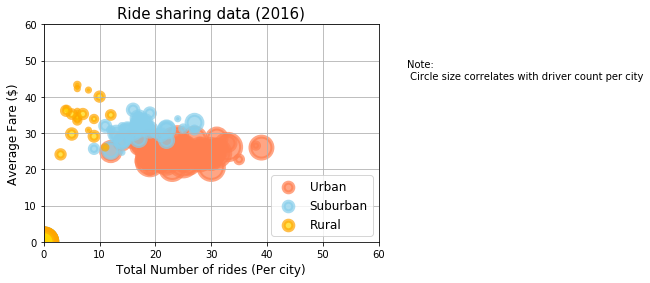

In [12]:
# create scatter plot: X axis: Total number of rides per city, Y axis: Average fares and city type plotted

u = df.type.str.count(r'Urban')
s = df.type.str.count(r'Suburban')
r = df.type.str.count(r'Rural')

x = (df['Total number of rides'] * u) 
y = (df['fare'] * u)

plt.scatter(x, y, alpha=0.7, c='coral', edgecolors='coral', s = df['driver_count']*10, label="Urban", linewidths=4)


x = (df['Total number of rides'] * s)
y = (df['fare'] * s)

plt.scatter(x, y, alpha=0.7, c='skyblue', edgecolors='skyblue', s = df['driver_count']*10, label='Suburban', linewidths=4)


x = (df['Total number of rides'] * r)
y = (df['fare'] * r)

plt.scatter(x, y, alpha=0.7, c='gold', edgecolors='orange', s = df['driver_count']*10, label='Rural', linewidths=4)




plt.ylim(0, 60)
plt.xlim(0, 60)
plt.ylabel('Average Fare ($)', fontsize = 12)
plt.xlabel('Total Number of rides (Per city)', fontsize = 12)
plt.title('Ride sharing data (2016)', fontsize = 15)
plt.grid()
plt.legend(loc="lower right", scatterpoints=1, fontsize=12, markerscale=0.5)
note =("Note:\n Circle size correlates with driver count per city")
plt.text(65,45,       note)
plt.show()

In [14]:
# created dataframe 1 total fare by city type and found % of total fare
df1 = pd.merge(city, ride, on='city')
df1 = df1.groupby('type')['fare'].sum()
df1 = pd.DataFrame(df1)
df1['% of total fare'] = df1['fare']/df1['fare'].sum()*100
df1 = df1.reset_index()
df1

,type,fare,% of total fare
0,Rural,4327.93,6.811493
1,Suburban,19356.33,30.463872
2,Urban,39854.38,62.724635


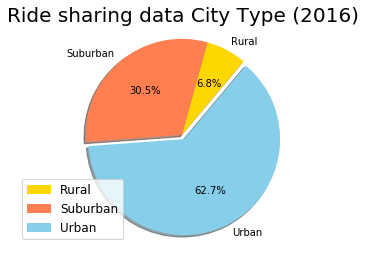

In [17]:
# Pie chart City Type

types = df1['type']
total_fare = df1['% of total fare'] 
colors = ["gold", "coral", "skyblue"]
explode = (0, 0, 0.05)
plt.pie(total_fare, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=50)

plt.title('Ride sharing data City Type (2016)', fontsize = 20)
plt.legend(loc="lower left", scatterpoints=1, fontsize=12)
plt.axis("equal")


plt.show()

In [18]:
# created dataframe 2 total number of rides and % of total rides per city type
df2 = df.groupby('type')['Total number of rides'].sum()

df2 = pd.DataFrame(df2)

df2 = df2.reset_index()
df2['% of total rides'] = df2['Total number of rides']/df2['Total number of rides'].sum()* 100
df2

,type,Total number of rides,% of total rides
0,Rural,125,5.263158
1,Suburban,625,26.315789
2,Urban,1625,68.421053


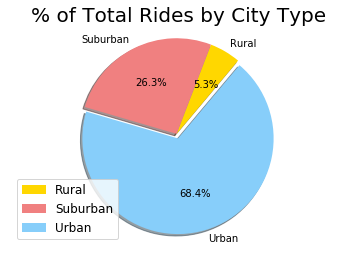

In [20]:
#Plotted pie chart based on type of city and % of total rides
types = df2['type']
total_rides = df2['% of total rides'] 
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.05)
plt.pie(total_rides, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=50)

plt.title('% of Total Rides by City Type', fontsize=20)
plt.legend(loc="lower left", scatterpoints=1, fontsize=12)
plt.axis("equal")
plt.show()

In [21]:

# created dataframe 3 of Total Drivers by City Type

df3 = df.groupby('type')['driver_count'].sum()
df3 = pd.DataFrame(df3)
df3 = df3.reset_index()
df3['% of total drivers'] = df3['driver_count']/df3['driver_count'].sum()* 100
df3

,type,driver_count,% of total drivers
0,Rural,78.0,2.623613
1,Suburban,490.0,16.481668
2,Urban,2405.0,80.894719


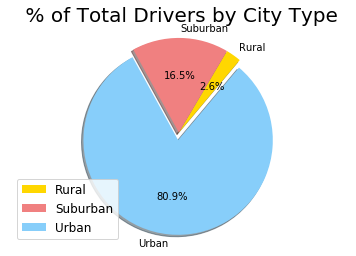

In [24]:
#Pie chart of % of Total Drivers by City Type
types = df3['type']
total_drivers = df3['% of total drivers'] 
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.08)
plt.pie(total_drivers, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=50)


plt.title(' % of Total Drivers by City Type', fontsize=20)
plt.legend(loc="lower left", scatterpoints=1, fontsize=12)
plt.axis("equal")
plt.show()